In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
# chaotic non hom I0 = -1.7005; U0 = 0.26505

I0 = -1.728; U0 = 0.282

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.739373436055542, 0.675053327961428, 0.44308612785116175] #[4.563436676974208, 0.8269388602301391, 0.44101854388786665];

3-element Vector{Float64}:
 10.739373436055542
  0.675053327961428
  0.44308612785116175

In [6]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.282, 0.305, 0.3, -1.728]
 time:          0.0
 state:         [10.739373436055542, 0.675053327961428, 0.44308612785116175]


In [7]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [8]:
idx = 1
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.3845755021405
 0.7369151686230455
 0.4305972484396863

In [9]:
prob = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol = solve(prob, alg = Vern9(), adaptive = false, dt = 0.001);

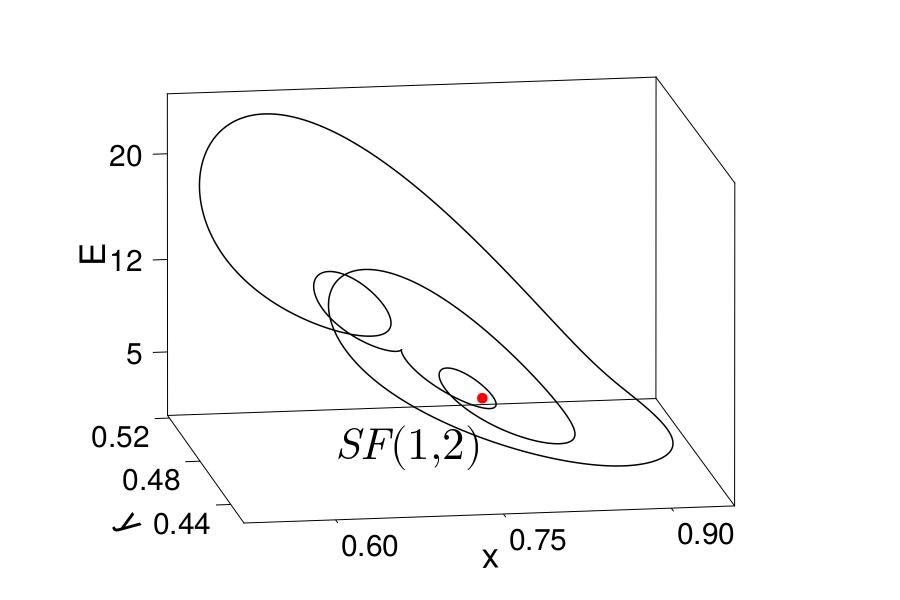

CairoMakie.Screen{IMAGE}


In [254]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [0.6, 0.75, 0.9], yticks = [0.44, 0.48, 0.52], zticks = [5, 12, 20])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

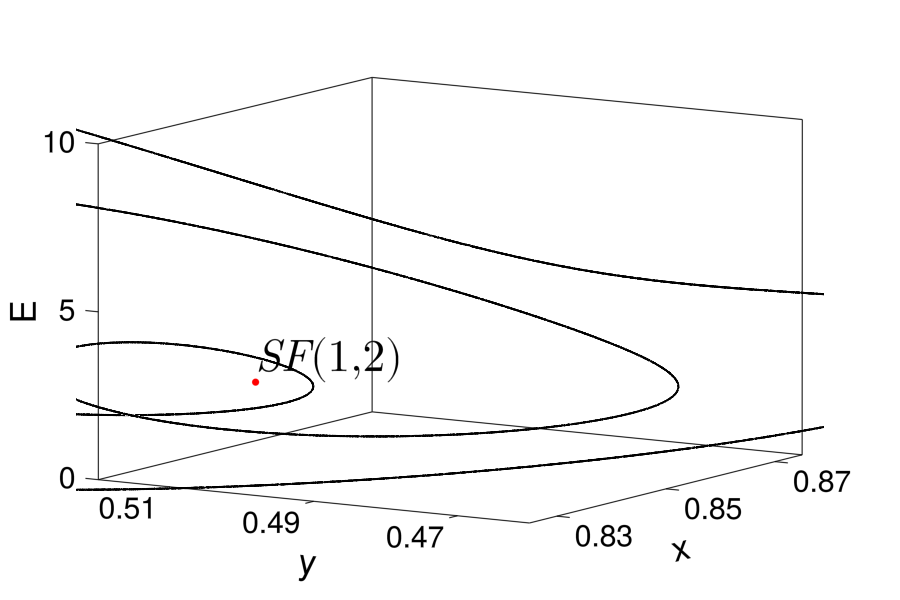

In [148]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 40;
disy = 40;
disz = 55;

GLMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.82pi, elevation = 0.05pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [0.83, 0.85, 0.87], yticks = [0.47, 0.49, 0.51])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 50, 50, 1)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

xlims!(0.825,0.875)
ylims!(0.46, 0.52)
zlims!(0, 10)
f

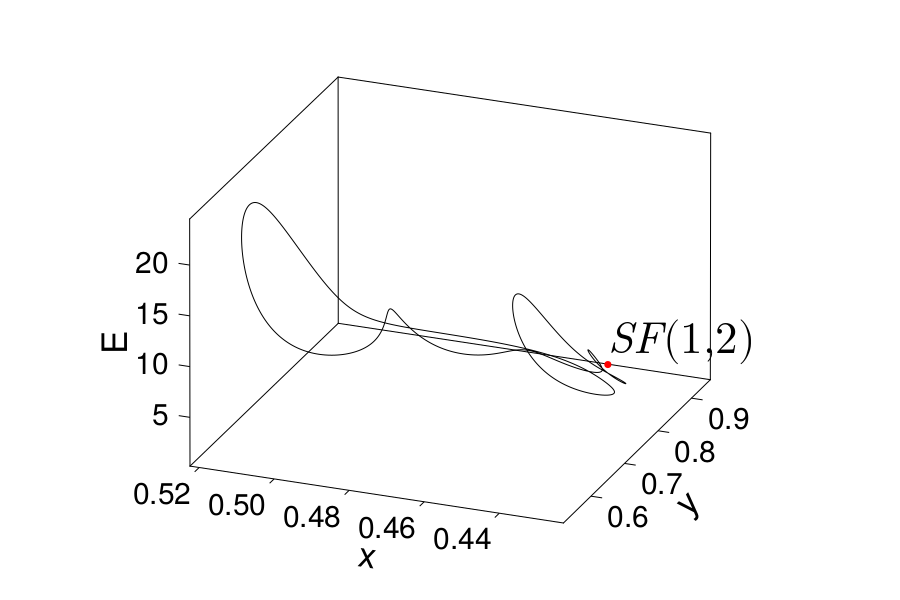

CairoMakie.Screen{IMAGE}


In [250]:
idx, idy, idz = 2, 3, 1
az = 1.12pi;
ts, tf = 960000, 980000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!()

f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "y", ylabel = "x", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end


display(f)

In [255]:
#save("phase_second_type_activity.eps", f)

CairoMakie.Screen{EPS}


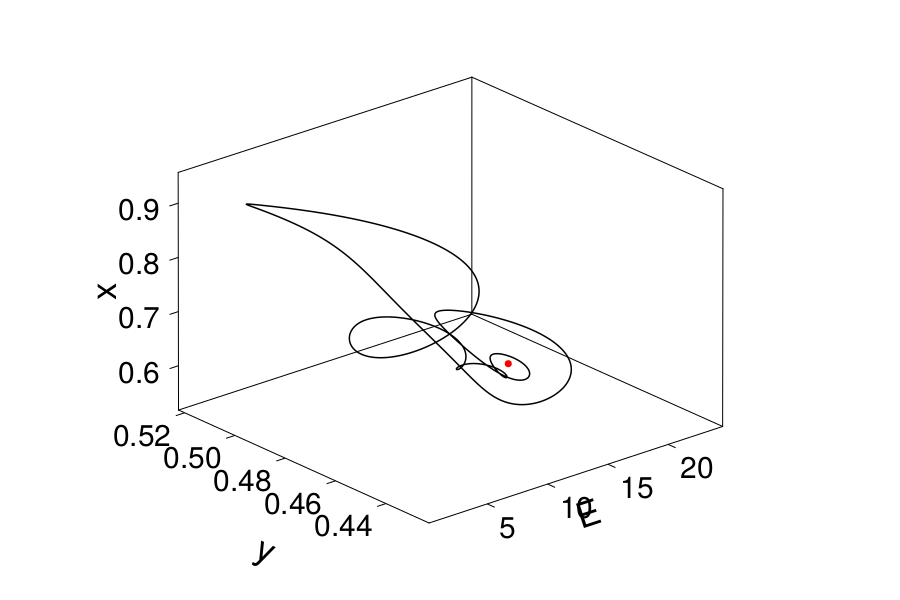

CairoMakie.Screen{IMAGE}


In [252]:
ts, tf = 960000, 994000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    #text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

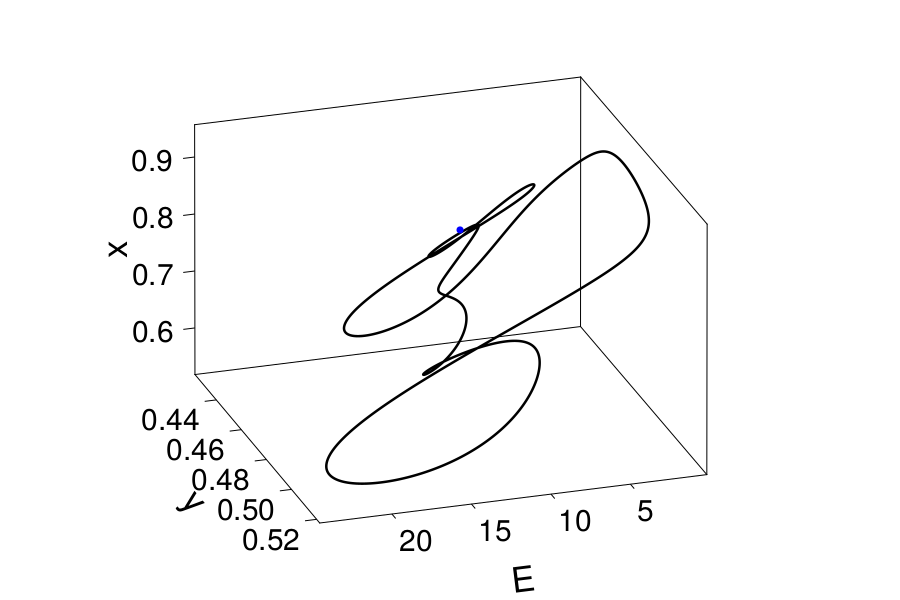

CairoMakie.Screen{IMAGE}


In [48]:
ts, tf = 500000, 520000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)
            #yticks = [0.43, 0.45, 0.48])

#ax = LScene(f[1, 1])

#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 2.5, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 10)
    #text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

#xlims!(7.0, 10.0)
#ylims!(0.44, 0.48)
#zlims!(0.7, 0.8)

display(f)

In [268]:
idx, idy, idz = 2, 3, 1

GLMakie.activate!()
f = Figure(resolution = (900, 900))
ax = LScene(f[1, 1])
scale!(ax.scene, 50, 50, 1)
lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 2.5, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 10)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [ ]:
ts, tf = 500000, 520000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)
            #yticks = [0.43, 0.45, 0.48])

#ax = LScene(f[1, 1])

#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 2.5, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

#xlims!(7.0, 10.0)
#ylims!(0.44, 0.48)
#zlims!(0.7, 0.8)

display(f)

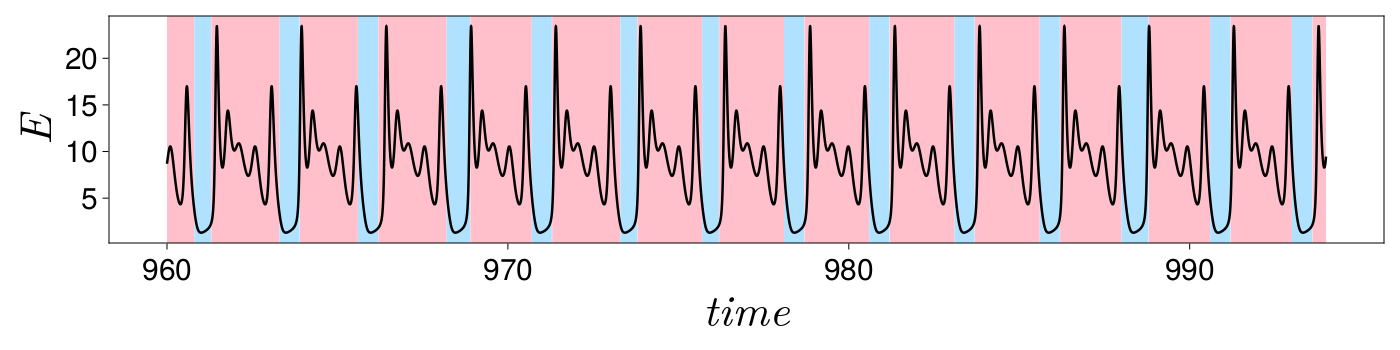

CairoMakie.Screen{IMAGE}


In [136]:
ts, tf = 960000, 994000 
#50000, 70000 # 960000, 994000 # 500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(resolution = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

pinkst = [960, 961.3, 963.9, 966.2, 968.9, 971.3, 973.8, 976.2, 978.7, 981.2, 983.7, 986.2, 988.8, 991.2, 993.6]
pinkend = [960.8, 963.3, 965.6, 968.2, 970.7, 973.3, 975.7, 978.1, 980.6, 983.1, 985.6, 988.0, 990.6, 993.0, 994.0]

bluest =  [960.8, 963.3, 965.6, 968.2, 970.7, 973.3, 975.7, 978.1, 980.6, 983.1, 985.6, 988.0, 990.6, 993.0]
bluend = [961.29, 963.89, 966.19, 968.89, 971.29, 973.79, 976.19, 978.69, 981.19, 983.69, 986.19, 988.79, 991.19, 993.59]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)


lines!(axis, sol.t[ts:tf], sol[1, ts:tf], linewidth = 2.5, color = :black)
display(f)

In [137]:
save("ts_second_type_activity.eps", f)

CairoMakie.Screen{EPS}
